In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [2]:
def get_Rg(filename):
    f = open(filename, 'r')
    gyr_data = []
    for line in f:
        if line[0] == "#" or line[0] == "@":
            continue
        tmp = line.split()
        gyr_data.append((int(tmp[0]), float(tmp[1])))
    f.close()
    return np.array(gyr_data).T

In [3]:
Rg_native = get_Rg('gyration_native.xvg')
Rg_mutant = get_Rg('gyration_mutant.xvg')
print(Rg_native)
print(Rg_mutant)

[[0.00000e+00 1.00000e+01 2.00000e+01 ... 1.99980e+05 1.99990e+05
  2.00000e+05]
 [3.02482e+00 3.05693e+00 3.05640e+00 ... 3.08998e+00 3.09061e+00
  3.09432e+00]]
[[0.00000e+00 1.00000e+01 2.00000e+01 ... 1.99980e+05 1.99990e+05
  2.00000e+05]
 [3.02335e+00 3.05767e+00 3.05753e+00 ... 3.08938e+00 3.08774e+00
  3.09210e+00]]


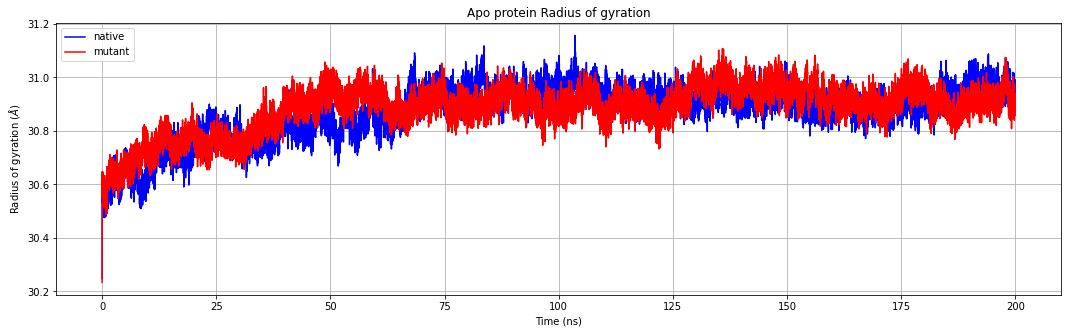

In [4]:
rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native[0] / 1000, Rg_native[1] * 10, color = 'blue', label = 'native')
ax1.plot(Rg_mutant[0] / 1000, Rg_mutant[1] * 10, color = 'red', label = 'mutant')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius of gyration ($\AA$)')
ax1.set_title('Apo protein Radius of gyration')
ax1.grid(5)
ax1.legend();
rg_plot.savefig('Rg.png', dpi = 500)

In [5]:
file = open('rmsf_native_res.xvg', 'r')
rmsf_native = []
mutations = []
k = 3
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if int(tmp[0]) == 23 or int(tmp[0]) == 24:
        tmp[0] = k
        mutations.append(k)
    else:
        tmp[0] = k
    rmsf_native.append((tmp[0], float(tmp[1])))
    k = k + 1
file.close()
print(mutations)
rmsf_native = np.array(rmsf_native).T
print(rmsf_native)

[23, 24, 351, 352, 679, 680, 1007, 1008]
[[3.000e+00 4.000e+00 5.000e+00 ... 1.312e+03 1.313e+03 1.314e+03]
 [1.224e-01 9.910e-02 8.880e-02 ... 7.930e-02 7.110e-02 5.740e-02]]


In [6]:
file = open('rmsf_mutant_res.xvg', 'r')
rmsf_mutant = []
mutations2 = []
k = 3
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if int(tmp[0]) == 23 or int(tmp[0]) == 24:
        tmp[0] = k
        mutations2.append(k)
    else:
        tmp[0] = k
    rmsf_mutant.append((int(tmp[0]), float(tmp[1])))
    k = k + 1
file.close()
print(mutations2)
rmsf_mutant = np.array(rmsf_mutant).T
print(rmsf_native)

[23, 24, 351, 352, 679, 680, 1007, 1008]
[[3.000e+00 4.000e+00 5.000e+00 ... 1.312e+03 1.313e+03 1.314e+03]
 [1.224e-01 9.910e-02 8.880e-02 ... 7.930e-02 7.110e-02 5.740e-02]]


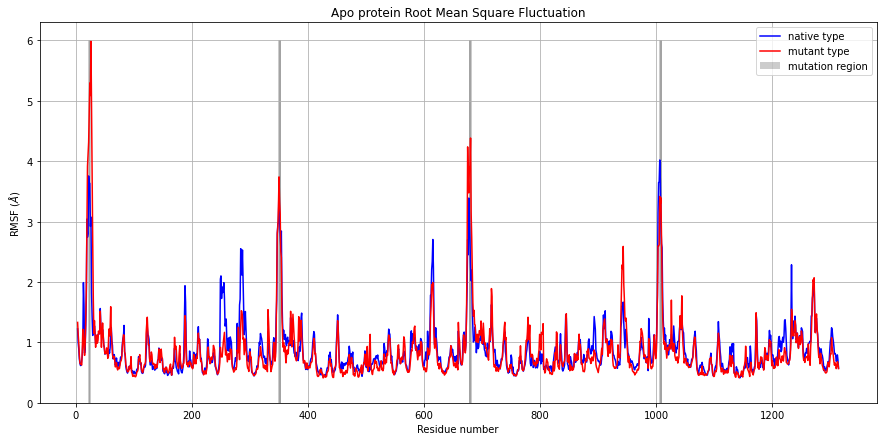

In [7]:
rmsf_plot = plt.figure(figsize = (15, 7))
ax = rmsf_plot.add_subplot(1, 1, 1)
ax.plot(rmsf_native[0], rmsf_native[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsf_mutant[0], rmsf_mutant[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Apo protein Root Mean Square Fluctuation')
ax.grid(1)
ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsf_plot.savefig('RMSF.png', dpi = 500)

In [8]:
file = open('rmsf_mutant_res.xvg')
rmsf_mutant = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_mutant.keys():
        rmsf_mutant[tmp[0]] += float(tmp[1])
    else:
        rmsf_mutant[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_mutant)
for key, val in rmsf_mutant.items():
    rmsf_mutant[key] = val / 4 * 10
print(rmsf_mutant)

{'3': 1.3165, '4': 1.1025, '5': 0.9570000000000001, '6': 0.7645000000000001, '7': 0.645, '8': 0.5930000000000001, '9': 0.6052500000000001, '10': 0.6245, '11': 0.75875, '12': 1.0587499999999999, '13': 1.09625, '14': 0.87175, '15': 0.7577500000000001, '16': 0.89225, '17': 1.273, '18': 2.0405, '19': 3.1172500000000003, '20': 3.28025, '21': 3.3637499999999996, '22': 3.8449999999999998, '23': 3.8232500000000003, '24': 4.0495, '25': 3.3702500000000004, '26': 3.2989999999999995, '27': 2.5012500000000006, '28': 1.8757500000000003, '29': 1.49775, '30': 1.3187499999999999, '31': 1.04425, '32': 1.14425, '33': 0.9799999999999999, '34': 0.83175, '35': 0.9545000000000001, '36': 1.0114999999999998, '37': 0.9165000000000001, '38': 0.96125, '39': 1.08125, '40': 1.06125, '41': 1.03325, '42': 1.52175, '43': 1.1555000000000002, '44': 0.9375, '45': 1.05225, '46': 1.27275, '47': 1.12, '48': 0.95275, '49': 0.8975, '50': 0.7987500000000001, '51': 0.80225, '52': 0.77725, '53': 0.7717499999999999, '54': 0.77725

In [9]:
file = open('rmsf_native_res.xvg')
rmsf_native = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_native.keys():
        rmsf_native[tmp[0]] += float(tmp[1])
    else:
        rmsf_native[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_native)
for key, val in rmsf_native.items():
    rmsf_native[key] = val / 4 * 10
print(rmsf_native)

{'3': 1.246, '4': 1.006, '5': 0.89625, '6': 0.74675, '7': 0.6805, '8': 0.6467499999999999, '9': 0.6459999999999999, '10': 0.6805, '11': 0.8629999999999999, '12': 1.066, '13': 1.30825, '14': 1.0535, '15': 0.7947500000000001, '16': 0.8925, '17': 1.376, '18': 1.76825, '19': 2.9195, '20': 2.9507499999999998, '21': 3.20875, '22': 3.6407500000000006, '23': 3.2569999999999997, '24': 2.9177499999999994, '25': 2.5435000000000003, '26': 2.67075, '27': 1.7235, '28': 1.341, '29': 1.0879999999999999, '30': 1.1835, '31': 1.0719999999999998, '32': 1.1912500000000001, '33': 1.0655, '34': 0.89725, '35': 0.9804999999999999, '36': 1.038, '37': 0.9532499999999999, '38': 0.9775, '39': 1.062, '40': 1.0592500000000002, '41': 1.0105, '42': 1.34575, '43': 1.1585, '44': 0.99325, '45': 1.014, '46': 1.14975, '47': 1.04175, '48': 0.90725, '49': 0.87675, '50': 0.792, '51': 0.8474999999999999, '52': 0.829, '53': 0.8952499999999999, '54': 0.873, '55': 0.8625, '56': 0.9284999999999999, '57': 1.0594999999999999, '58': 

In [10]:
label_regions = [x for x in range(21, 42)]
label_regions.extend([x for x in range(56, 59)])
label_regions.extend([x for x in range(80, 83)])
label_regions.extend([x for x in range(207, 213)])
label_regions.extend([x for x in range(231, 236)])
label_regions.extend([x for x in range(246, 258)])
label_regions.extend([x for x in range(281, 290)])

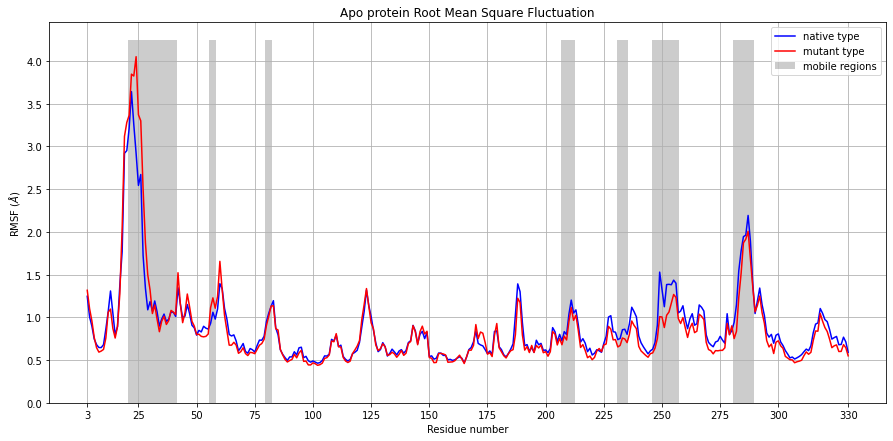

In [11]:
rmsf_plot = plt.figure(figsize = (15, 7))
ax = rmsf_plot.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_native.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_native.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_mutant.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Apo protein Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
ax.bar(label_regions, 4.24, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax.legend()
rmsf_plot.savefig('RMSF_average.png', dpi = 500)

In [12]:
rmsd_native = []
file = open('rmsd_native.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_native.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_native = np.array(rmsd_native).T
print(rmsd_native)

[[0.00000000e+00 1.00000000e-02 2.00000000e-02 ... 1.99980011e+02
  1.99990005e+02 2.00000015e+02]
 [3.90000000e-05 7.15753000e-02 6.73816000e-02 ... 1.96877900e-01
  2.02422700e-01 1.96478500e-01]]


In [13]:
rmsd_mutant = []
file = open('rmsd_mutant.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_mutant.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_mutant = np.array(rmsd_mutant).T
print(rmsd_mutant)

[[0.00000000e+00 1.00000000e-02 2.00000000e-02 ... 1.99980011e+02
  1.99990005e+02 2.00000015e+02]
 [6.00000000e-07 7.11827000e-02 7.55415000e-02 ... 2.24170700e-01
  2.20648900e-01 2.27140300e-01]]


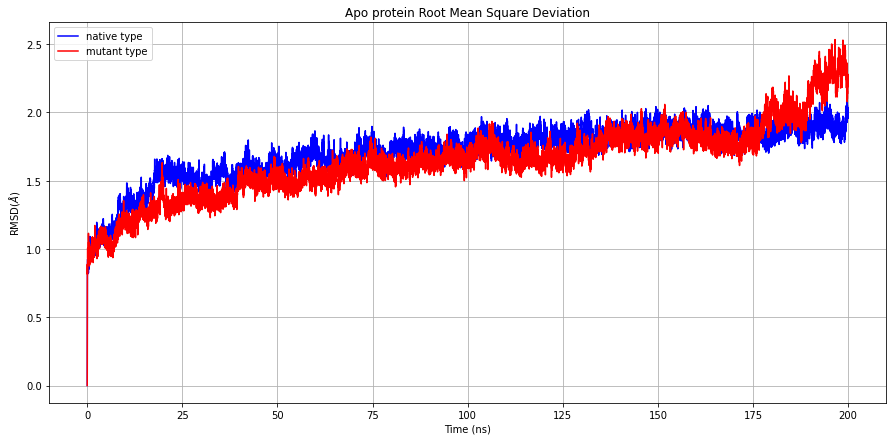

In [14]:
rmsd_plot = plt.figure(figsize = (15, 7))
ax = rmsd_plot.add_subplot(1, 1, 1)
ax.plot(rmsd_native[0], rmsd_native[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_mutant[0], rmsd_mutant[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD($\AA$)')
ax.set_title('Apo protein Root Mean Square Deviation')
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsd_plot.savefig('RMSD.png', dpi = 500, backend = 'cairo')

In [16]:
file = open('rmsf_last_25ns.xvg', 'r')
rmsf_mutant_last25ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_mutant_last25ns.keys():
        rmsf_mutant_last25ns[tmp[0]] += float(tmp[1])
    else:
        rmsf_mutant_last25ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_mutant_last25ns)
for key, val in rmsf_mutant_last25ns.items():
    rmsf_mutant_last25ns[key] = val / 4 * 10
print(rmsf_mutant_last25ns)

{'3': 1.07125, '4': 0.8474999999999999, '5': 0.7452500000000001, '6': 0.62525, '7': 0.5694999999999999, '8': 0.5327500000000001, '9': 0.5277499999999999, '10': 0.5497500000000001, '11': 0.5545, '12': 0.751, '13': 0.8255, '14': 0.7212500000000001, '15': 0.7190000000000001, '16': 0.84425, '17': 1.2045, '18': 1.39425, '19': 1.7069999999999999, '20': 1.8952499999999999, '21': 2.18725, '22': 2.5175, '23': 2.6550000000000002, '24': 2.97675, '25': 2.9175, '26': 3.244, '27': 2.77425, '28': 2.2947499999999996, '29': 2.08325, '30': 1.67025, '31': 1.068, '32': 1.079, '33': 0.8847500000000001, '34': 0.7769999999999999, '35': 0.8507500000000001, '36': 0.85425, '37': 0.784, '38': 0.821, '39': 0.9094999999999999, '40': 0.89175, '41': 0.8485, '42': 1.19825, '43': 0.96775, '44': 0.8065, '45': 0.8709999999999998, '46': 1.02575, '47': 0.9137500000000001, '48': 0.7895000000000001, '49': 0.7565, '50': 0.7090000000000001, '51': 0.762, '52': 0.711, '53': 0.68825, '54': 0.65525, '55': 0.7137499999999999, '56'

KeyError: 0

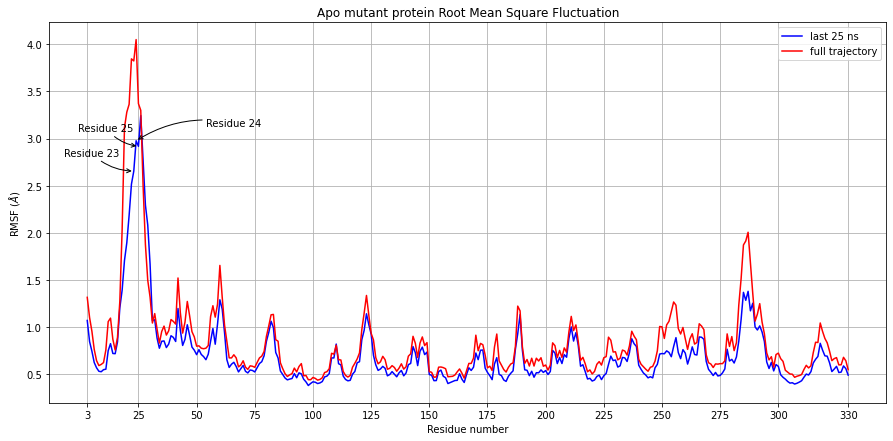

In [17]:
rmsf_plot = plt.figure(figsize = (15, 7))
ax = rmsf_plot.add_subplot(1, 1, 1)
ax.plot(x_scale, rmsf_mutant_last25ns.values(), color = 'blue', label = 'last 25 ns')
ax.plot(x_scale, rmsf_mutant.values(), color = 'red', label = 'full trajectory')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Apo mutant protein Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
ax.legend()
rmsf_plot.savefig('RMSF_mutant_last25ns.png', dpi = 500)
ax.annotate('Residue 23', xy=(23, rmsf_mutant_last25ns['23']),xycoords='data', \
  xytext=(-70, 15), textcoords='offset points',fontsize=10, \
  arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate('Residue 24', xy=(24, rmsf_mutant_last25ns['24']),xycoords='data', \
  xytext=(70, 15), textcoords='offset points',fontsize=10, \
  arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate('Residue 25', xy=(25, rmsf_mutant_last25ns['25']),xycoords='data', \
  xytext=(-60, 15), textcoords='offset points',fontsize=10, \
  arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
ax.annotate('Residue 26', xy=(rmsf_mutant_last25ns[0][23], rmsf_mutant_last25ns[1][23] * 10),xycoords='data', \
  xytext=(60, 15), textcoords='offset points',fontsize=10, \
  arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))